<a href="https://colab.research.google.com/github/AhmedAboushanab/My-Python-Works/blob/master/Copy_of_Both_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Models

## Importing the libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

## Importing the dataset

In [70]:
dataset = pd.read_csv('Meta-Analysis-Demo-4 - Sheet21.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,215:217])
X[:, 215:217] = imputer.transform(X[:, 215:217])

In [72]:
print(X)

[['A' 'P' 'E' ... 'K' 'G' 'K']
 ['A' 'P' 'E' ... 'K' 'G' 'K']
 ['A' 'P' 'E' ... 'P' 'G' 'K']
 ...
 ['A' 'P' 'E' ... 'P' 'G' 'K']
 ['A' 'P' 'E' ... 'K' 'G' 'K']
 ['A' 'P' 'E' ... 'P' 'G' 'K']]


In [41]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Assuming X is your dataset with missing values
# ... (Your code to load and prepare the dataset)

# Identify the columns with non-numeric data
non_numeric_cols = X[:, 215:217].astype(str)
non_numeric_cols = np.any(pd.DataFrame(non_numeric_cols).apply(pd.to_numeric, errors='coerce').isnull(), axis=0)
non_numeric_cols = np.where(non_numeric_cols)[0] + 215  # Adjust for slicing offset

# Create a SimpleImputer for numeric columns (strategy='mean')
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Create a SimpleImputer for non-numeric columns (strategy='most_frequent')
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Apply imputation to numeric columns
num_cols = np.delete(np.arange(215, 217), non_numeric_cols - 215)
if len(num_cols)>0:
  num_imputer.fit(X[:, num_cols])
  X[:, num_cols] = num_imputer.transform(X[:, num_cols])

# Apply imputation to non-numeric columns
if len(non_numeric_cols)>0:
  cat_imputer.fit(X[:, non_numeric_cols])
  X[:, non_numeric_cols] = cat_imputer.transform(X[:, non_numeric_cols])

# ... (Rest of your code)

## Encoding categorical data

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), list(range(0, 217)))], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [74]:
print(X)

[[1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]]


## Taking care of missing data

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,215:217])
X[:, 215:217] = imputer.transform(X[:, 215:217])

In [49]:
print(X)

[[1.0 1.0 0.0 ... 0.0 1.0 'K']
 [1.0 1.0 0.0 ... 0.0 1.0 'K']
 [1.0 1.0 0.0 ... 1.0 1.0 'K']
 ...
 [1.0 1.0 0.0 ... 1.0 1.0 'K']
 [1.0 1.0 0.0 ... 0.0 1.0 'K']
 [1.0 1.0 0.0 ... 1.0 1.0 'K']]


## Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import GroupShuffleSplit
X_train, X_test, y_train, y_test = GroupShuffleSplit(n_splits=5, train_size=.75, random_state=42)

TypeError: cannot unpack non-iterable GroupShuffleSplit object

In [81]:
from sklearn.model_selection import GroupShuffleSplit

# Assuming you have features in X and target variable in y,
# and a 'group' variable for GroupShuffleSplit
# Replace 'groups' with your actual group variable

# Create the GroupShuffleSplit object
gss = GroupShuffleSplit(n_splits=5, train_size=.75, random_state=42)

# Get the indices for the first split
# Assuming 'groups' is your group variable
# Replace with your actual group variable if different
train_idx, test_idx = next(gss.split(X, y, groups=y))

# Split the data using the obtained indices
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [83]:
print(X_train)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]]


In [84]:
print(y_train)

['Bad' 'Bad' 'Hit' 'Bad' 'Good' 'Hit' 'Bad' 'Hit' 'Bad' 'Bad' 'Good' 'Bad'
 'Bad' 'Bad' 'Good' 'Hit' 'Bad' 'Hit' 'Good' 'Bad' 'Bad' 'Hit' 'Good'
 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Hit' 'Hit' 'Hit' 'Good'
 'Good' 'Bad' 'Bad' 'Hit' 'Hit' 'Bad' 'Good' 'Hit' 'Bad' 'Bad' 'Bad' 'Hit'
 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Hit' 'Bad' 'Hit' 'Hit'
 'Bad' 'Bad' 'Hit' 'Good' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Good' 'Bad' 'Bad'
 'Hit' 'Hit' 'Bad' 'Hit' 'Hit' 'Bad' 'Hit' 'Hit' 'Bad' 'Hit' 'Bad' 'Hit'
 'Good' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad'
 'Bad' 'Hit' 'Bad' 'Hit' 'Bad' 'Hit' 'Bad' 'Bad' 'Bad' 'Good' 'Good' 'Bad'
 'Hit' 'Good' 'Hit' 'Hit' 'Hit' 'Good' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Hit'
 'Bad' 'Hit' 'Good' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Bad'
 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Good' 'Bad' 'Bad'
 'Bad' 'Hit' 'Good' 'Bad' 'Hit' 'Bad' 'Hit' 'Bad' 'Hit' 'Hit' 'Bad' 'Hit'
 'Hit' 'Hit' 'Good' 'Bad' 'Bad' 'Hit' '

In [85]:
print(X_test)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [86]:
print(y_test)

['Bad' 'Hit' 'Hit' 'Hit' 'Bad' 'Hit' 'Bad' 'Bad' 'Hit' 'Bad' 'Bad' 'Good'
 'Bad' 'Bad' 'Hit' 'Hit' 'Bad' 'Hit' 'Good' 'Good' 'Hit' 'Hit' 'Bad' 'Bad'
 'Hit' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Hit' 'Bad' 'Hit' 'Hit' 'Good'
 'Bad' 'Bad' 'Hit' 'Bad' 'Hit' 'Hit' 'Hit' 'Bad' 'Good' 'Good' 'Good'
 'Hit' 'Bad' 'Bad' 'Good' 'Hit' 'Hit' 'Bad' 'Bad' 'Good' 'Hit' 'Bad' 'Bad'
 'Bad' 'Bad' 'Good' 'Bad' 'Bad' 'Bad' 'Bad' 'Good' 'Bad' 'Bad' 'Bad' 'Bad'
 'Bad' 'Bad' 'Bad' 'Good' 'Bad' 'Bad' 'Good' 'Bad' 'Good' 'Good' 'Good'
 'Good' 'Bad' 'Hit' 'Bad' 'Hit' 'Good' 'Good' 'Hit' 'Good' 'Bad' 'Bad'
 'Bad' 'Hit' 'Good' 'Bad' 'Good' 'Bad' 'Hit' 'Bad' 'Hit' 'Bad' 'Bad']


**Feature Scaling**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
#print(X_train)

In [ ]:
#print(X_test)

**For loop for both Models**

In [87]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state = 0, max_iter=1000)))
models.append(('RF', RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(estimator = model, X = X_train, y = y_train, cv = 100)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 47 members, which is less than n_splits=100.
  warnings.warn(


LR: 0.785833 (0.204551)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 47 members, which is less than n_splits=100.
  warnings.warn(


RF: 0.789167 (0.199811)


**boxplot algorithm comparison**

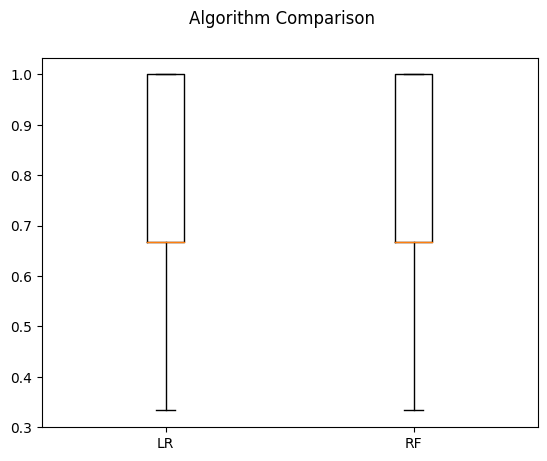

In [88]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()